# Assignment 4 – MongoDB & PyMongon.

In [4]:
import pymongo
import pandas as pd

### a) Create collections “flights” inside database “airline_delayDB”

In [5]:

    client = pymongo.MongoClient('localhost:27017')
    db = client['airline_delayDB']
    
    collection = db["flights"]
    
    

### b) How would you insert this entire dataset into a MongoDB collection named flights? Describe the structure of each document.

In [6]:
flights_df = pd.read_csv("D:/Flights_Delay.csv")


# Calculate the mean of the column, ignoring NaN values
mean_value = flights_df['ARRIVAL_DELAY'].mean()

# Replace NaN values with the mean
flights_df['ARRIVAL_DELAY'].fillna(mean_value, inplace=True)

records = flights_df.to_dict(orient='records')
    

    

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7860\3799098743.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flights_df['ARRIVAL_DELAY'].fillna(mean_value, inplace=True)


In [ ]:

if records:
    collection.insert_many(records)



In [135]:
flights_df

,ID,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,0,2015,3,4,3,EV,5170,N842AS,CVG,XNA,...,1103.0,33.000000,0,0,NaN,14.0,0.0,19.0,0.0,0.0
1,1,2015,2,2,1,MQ,3584,N646MQ,DFW,SPS,...,1402.0,32.000000,0,0,NaN,0.0,0.0,32.0,0.0,0.0
2,2,2015,1,27,2,B6,716,N309JB,JAX,DCA,...,1655.0,96.000000,0,0,NaN,6.0,0.0,90.0,0.0,0.0
3,3,2015,1,28,3,EV,4289,N14162,COS,IAH,...,1742.0,-19.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2015,2,5,4,EV,5584,N851AS,ATL,AVL,...,1352.0,9.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,55995,2015,2,4,3,B6,1567,N508JB,HPN,PBI,...,1338.0,174.000000,0,0,NaN,10.0,0.0,164.0,0.0,0.0
55996,55996,2015,1,17,6,AA,1113,N4YBAA,PIT,DFW,...,1055.0,-30.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
55997,55997,2015,1,17,6,US,661,N534UW,LAX,PHL,...,1424.0,-3.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
55998,55998,2015,1,13,2,DL,1318,N348NB,ATL,CLT,...,1116.0,-3.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### c) Write a MongoDB command to insert a single flight record from the dataset.

In [41]:

collection.insert_one({
    "ID": 56000,
    "YEAR": 2015,
    "MONTH": 3,
    "DAY": 4,
    "DAY_OF_WEEK": 3,
    "AIRLINE": "EV",
    "FLIGHT_NUMBER": 5170,
    "TAIL_NUMBER": "N842AS",
    "ORIGIN_AIRPORT": "CVG",
    "DESTINATION_AIRPORT": "XNA",
    "SCHEDULED_DEPARTURE": 935,
    "DEPARTURE_TIME": 954,
    "DEPARTURE_DELAY": 19,
    "TAXI_OUT": 16,
    "WHEELS_OFF": 1010,
    "SCHEDULED_TIME": 115,
    "ELAPSED_TIME": 129,
    "AIR_TIME": 108,
    "DISTANCE": 562,
    "WHEELS_ON": 1058,
    "TAXI_IN": 5,
    "SCHEDULED_ARRIVAL": 1030,
    "ARRIVAL_TIME": 1103,
    "ARRIVAL_DELAY": 33,
    "DIVERTED": 0,
    "CANCELLED": 0,
    "CANCELLATION_REASON": "",
    "AIR_SYSTEM_DELAY": 14,
    "SECURITY_DELAY": 0,
    "AIRLINE_DELAY": 19,
    "LATE_AIRCRAFT_DELAY": 0,
    "WEATHER_DELAY": 0
})

InsertOneResult(ObjectId('66d40685bfcd1c5ca62f2b3e'), acknowledged=True)

##  Write mongo queries to show following analysis

### d) Write a MongoDB query to find all flights that were delayed by more than 60 minutes.

In [58]:
res = collection.find({'ARRIVAL_DELAY':{'$gt': 60 }})
for i in range(10):
    print(res[i])

{'_id': ObjectId('66d095ad4ff127b4e055cff0'), 'ID': 2, 'YEAR': 2015, 'MONTH': 1, 'DAY': 27, 'DAY_OF_WEEK': 2, 'AIRLINE': 'B6', 'FLIGHT_NUMBER': 716, 'TAIL_NUMBER': 'N309JB', 'ORIGIN_AIRPORT': 'JAX', 'DESTINATION_AIRPORT': 'DCA', 'SCHEDULED_DEPARTURE': 1335, 'DEPARTURE_TIME': 1505.0, 'DEPARTURE_DELAY': 90.0, 'TAXI_OUT': 16.0, 'WHEELS_OFF': 1521.0, 'SCHEDULED_TIME': 104, 'ELAPSED_TIME': 110.0, 'AIR_TIME': 91.0, 'DISTANCE': 634, 'WHEELS_ON': 1652.0, 'TAXI_IN': 3.0, 'SCHEDULED_ARRIVAL': 1519, 'ARRIVAL_TIME': 1655.0, 'ARRIVAL_DELAY': 96.0, 'DIVERTED': 0, 'CANCELLED': 0, 'CANCELLATION_REASON': nan, 'AIR_SYSTEM_DELAY': 6.0, 'SECURITY_DELAY': 0.0, 'AIRLINE_DELAY': 90.0, 'LATE_AIRCRAFT_DELAY': 0.0, 'WEATHER_DELAY': 0.0}
{'_id': ObjectId('66d095ad4ff127b4e055d009'), 'ID': 27, 'YEAR': 2015, 'MONTH': 2, 'DAY': 1, 'DAY_OF_WEEK': 7, 'AIRLINE': 'OO', 'FLIGHT_NUMBER': 2699, 'TAIL_NUMBER': 'N897SK', 'ORIGIN_AIRPORT': 'PHX', 'DESTINATION_AIRPORT': 'FAT', 'SCHEDULED_DEPARTURE': 1445, 'DEPARTURE_TIME': 19

### e) How would you query all flights that were cancelled (CANCELLED flag set to 1) and return only the AIRLINE, ORIGIN_AIRPORT, and CANCELLATION_REASON fields?

In [59]:
cancelled_flights = collection.find({'CANCELLED':1},{'_id':0,'AIRLINE':1,'ORIGIN_AIRPORT':1,'CANCELLATION_REASON':1})
for i in range(10):
    print(cancelled_flights[i])
    

{'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'MLI', 'CANCELLATION_REASON': 'C'}
{'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'BWI', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'DL', 'ORIGIN_AIRPORT': 'SFO', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'DFW', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'MQ', 'ORIGIN_AIRPORT': 'LGA', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'BDL', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'MKE', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'US', 'ORIGIN_AIRPORT': 'DCA', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'FLL', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'ORF', 'CANCELLATION_REASON': 'B'}


### f) Using MongoDB’s aggregation framework, how would you calculate the average arrival delay (ARRIVAL_DELAY) for each airline? [Create a suitable plot using matplotlib/seaborn]

{'avg_arrival_delay': 10.073421778519297, 'airline': 'OO'}
{'avg_arrival_delay': -1.4630860686149247, 'airline': 'AS'}
{'avg_arrival_delay': 5.1834048047262185, 'airline': 'VX'}
{'avg_arrival_delay': 17.833394309895525, 'airline': 'MQ'}
{'avg_arrival_delay': 4.091664586877529, 'airline': 'HA'}
{'avg_arrival_delay': 8.346095401265277, 'airline': 'AA'}
{'avg_arrival_delay': 14.072952878396256, 'airline': 'NK'}
{'avg_arrival_delay': 2.9299492172514516, 'airline': 'DL'}
{'avg_arrival_delay': 10.699540805997232, 'airline': 'EV'}
{'avg_arrival_delay': 6.720678479277012, 'airline': 'UA'}
{'avg_arrival_delay': 3.826662546178044, 'airline': 'WN'}
{'avg_arrival_delay': 23.87405546252561, 'airline': 'F9'}
{'avg_arrival_delay': 13.553304052964855, 'airline': 'B6'}
{'avg_arrival_delay': 6.048430958417363, 'airline': 'US'}


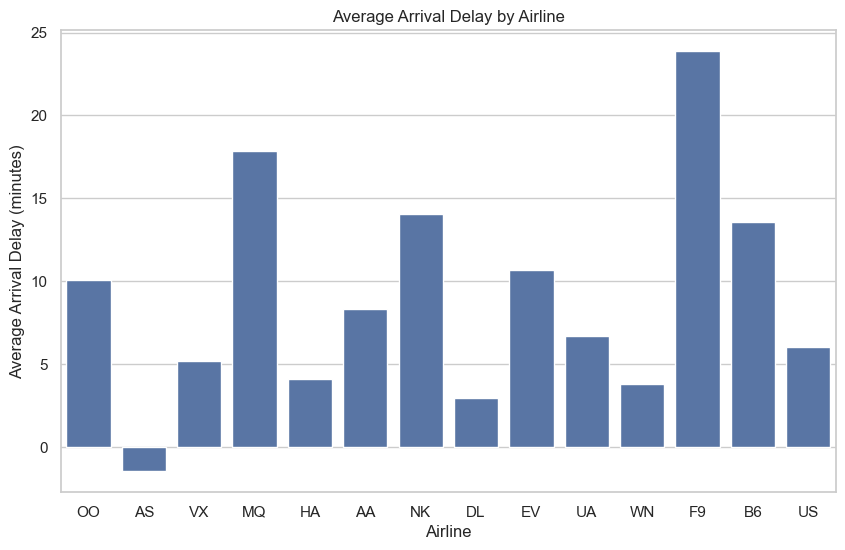

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


avg_arrival_delay = list(collection.aggregate([
    {
        '$group': {
            '_id': '$AIRLINE',
            'avg_arrival_delay': { '$avg': '$ARRIVAL_DELAY' }
        }
    },
    {
        '$project': {
            '_id': 0,
            'airline': '$_id',
            'avg_arrival_delay': 1
        }
    }
]))


for i in avg_arrival_delay:
    print(i)


df = pd.DataFrame(avg_arrival_delay)

# Plotting
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(y='avg_arrival_delay', x='airline', data=df)
plt.ylabel('Average Arrival Delay (minutes)')
plt.xlabel('Airline')
plt.title('Average Arrival Delay by Airline')
plt.show()


### g) Days of months with respect to average of arrival delays. [Create a suitable plot using matplotlib/seaborn]

{'avg_arrival_delay': 17.74434808045935, 'DAY': 3}
{'avg_arrival_delay': 16.712206779941475, 'DAY': 4}
{'avg_arrival_delay': 15.488458760021025, 'DAY': 5}
{'avg_arrival_delay': 14.450282210889847, 'DAY': 2}
{'avg_arrival_delay': 14.000162136498453, 'DAY': 1}
{'avg_arrival_delay': 11.663422692925359, 'DAY': 26}
{'avg_arrival_delay': 11.195221142207528, 'DAY': 12}
{'avg_arrival_delay': 10.538030614747168, 'DAY': 6}
{'avg_arrival_delay': 9.062961532136546, 'DAY': 16}
{'avg_arrival_delay': 8.71059905040218, 'DAY': 17}
{'avg_arrival_delay': 6.946969843693744, 'DAY': 21}
{'avg_arrival_delay': 6.575322426802607, 'DAY': 22}
{'avg_arrival_delay': 5.807079016254699, 'DAY': 24}
{'avg_arrival_delay': 5.295880242809825, 'DAY': 8}
{'avg_arrival_delay': 5.024759291479195, 'DAY': 27}
{'avg_arrival_delay': 5.006140332549364, 'DAY': 25}
{'avg_arrival_delay': 4.538723235601764, 'DAY': 9}
{'avg_arrival_delay': 4.513829500776956, 'DAY': 30}
{'avg_arrival_delay': 4.353334897695419, 'DAY': 23}
{'avg_arrival_

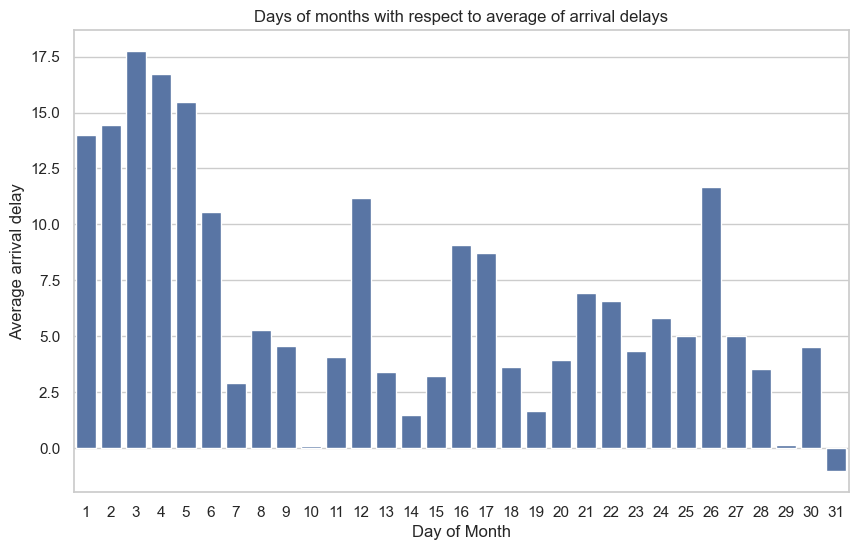

In [42]:
avg_arrival_delays = list(collection.aggregate([
    {
        '$group': {
            '_id': '$DAY',
            'avg_arrival_delay': {'$avg': '$ARRIVAL_DELAY'} }
        }
    ,
    {
        '$project': {
            '_id': 0,
            'DAY': '$_id',
            'avg_arrival_delay': 1
        }
    },
    {'$sort': {'avg_arrival_delay':-1}}
]))

for i in avg_arrival_delays:
    print(i)

df = pd.DataFrame(avg_arrival_delays)

# Plotting
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(y='avg_arrival_delay', x='DAY', data=df)
plt.ylabel('Average arrival delay')
plt.xlabel('Day of Month')
plt.title('Days of months with respect to average of arrival delays')
plt.show()

### h) Write a MongoDB aggregation pipeline to find the top 10 airports with the highest average total delay (DEPARTURE_DELAY + ARRIVAL DELAY).

In [43]:
top_airports = collection.aggregate([
    {
        '$group': {
            '_id': '$ORIGIN_AIRPORT',
            'avg_total_delay': {
                '$avg': {
                    '$add': ['$DEPARTURE_DELAY', '$ARRIVAL_DELAY']
                }
            }
        }
    },
    {
        '$project': {
            '_id': 0,
            'airport': '$_id',
            'avg_total_delay': 1
        }
    },
    {
        '$sort': {
            'avg_total_delay': -1
        }
    }, {'$limit': 10}
])

for i in top_airports:
    print(i)

{'avg_total_delay': 250.66666666666666, 'airport': 'HOB'}
{'avg_total_delay': 210.2, 'airport': 'CDC'}
{'avg_total_delay': 191.2, 'airport': 'PIH'}
{'avg_total_delay': 168.66666666666666, 'airport': 'ILG'}
{'avg_total_delay': 168.25, 'airport': 'HIB'}
{'avg_total_delay': 128.71428571428572, 'airport': 'SCE'}
{'avg_total_delay': 77.16666666666667, 'airport': 'PSG'}
{'avg_total_delay': 64.6, 'airport': 'AVL'}
{'avg_total_delay': 63.833333333333336, 'airport': 'MDT'}
{'avg_total_delay': 63.43478260869565, 'airport': 'ATW'}


### i) Explain how you would create an index on the ORIGIN_AIRPORT and DESTINATION_AIRPORT fields to optimize queries filtering by these fields.

In [53]:
collection.create_index([('ORIGIN_AIRPORT',1), ('DESTINATION_AIRPORT',1)])

'ORIGIN_AIRPORT_1_DESTINATION_AIRPORT_1'

### j) Arrange weekdays with respect to the average arrival delays caused. [Create a suitable plot using matplotlib/seaborn]

{'avg_arrival_delay': 10.602689477834318, 'DAY_OF_WEEK': 1}
{'avg_arrival_delay': 9.967281279411091, 'DAY_OF_WEEK': 7}
{'avg_arrival_delay': 8.009564013571655, 'DAY_OF_WEEK': 2}
{'avg_arrival_delay': 7.1893119508878, 'DAY_OF_WEEK': 4}
{'avg_arrival_delay': 6.037484969310992, 'DAY_OF_WEEK': 5}
{'avg_arrival_delay': 5.6553736258391805, 'DAY_OF_WEEK': 3}
{'avg_arrival_delay': 4.969349318370331, 'DAY_OF_WEEK': 6}


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4848\1631696907.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='avg_arrival_delay', x='DAY_OF_WEEK', data=df, palette='viridis')


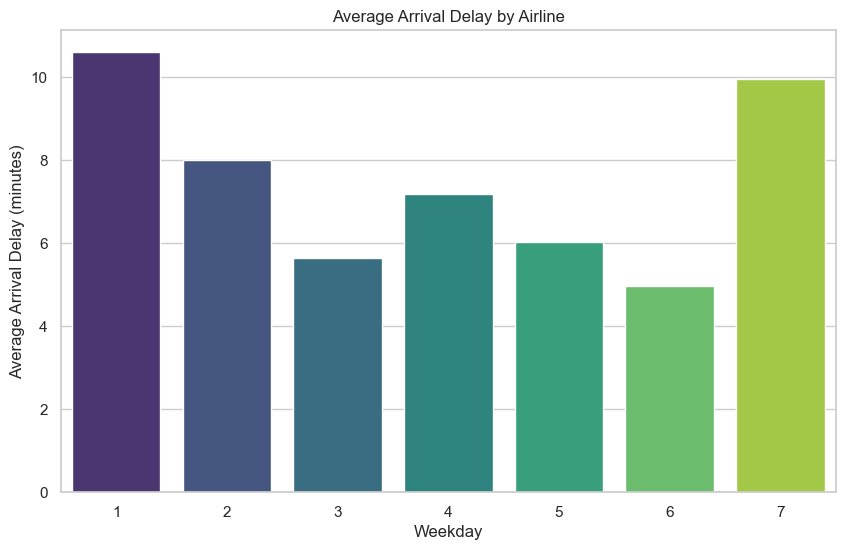

In [44]:
avg_arrival_delay = list(collection.aggregate([
    {
        '$group': {
            '_id': '$DAY_OF_WEEK',
            'avg_arrival_delay': {'$avg': '$ARRIVAL_DELAY'} }
        }
    ,
    {
        '$project': {
            '_id': 0,
            'DAY_OF_WEEK': '$_id',
            'avg_arrival_delay': 1
        }
    },
    {'$sort': {'avg_arrival_delay':-1}}
]))


for i in avg_arrival_delay:
    print(i)


df = pd.DataFrame(avg_arrival_delay)

# Plotting
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(y='avg_arrival_delay', x='DAY_OF_WEEK', data=df, palette='viridis')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xlabel('Weekday')
plt.title('Average Arrival Delay by Airline')
plt.show()


### k) Arrange Days of month as per cancellations done in descending order. [Create a suitable plot using matplotlib/seaborn]

{'cancellation_count': 237, 'DAY': 1}
{'cancellation_count': 215, 'DAY': 5}
{'cancellation_count': 195, 'DAY': 2}
{'cancellation_count': 185, 'DAY': 27}
{'cancellation_count': 114, 'DAY': 26}
{'cancellation_count': 113, 'DAY': 4}
{'cancellation_count': 98, 'DAY': 28}
{'cancellation_count': 89, 'DAY': 9}
{'cancellation_count': 88, 'DAY': 3}
{'cancellation_count': 83, 'DAY': 15}
{'cancellation_count': 69, 'DAY': 23}
{'cancellation_count': 63, 'DAY': 16}
{'cancellation_count': 61, 'DAY': 21}
{'cancellation_count': 61, 'DAY': 25}
{'cancellation_count': 61, 'DAY': 8}
{'cancellation_count': 59, 'DAY': 17}
{'cancellation_count': 57, 'DAY': 24}
{'cancellation_count': 53, 'DAY': 6}
{'cancellation_count': 41, 'DAY': 22}
{'cancellation_count': 31, 'DAY': 7}
{'cancellation_count': 30, 'DAY': 14}
{'cancellation_count': 27, 'DAY': 10}
{'cancellation_count': 24, 'DAY': 11}
{'cancellation_count': 21, 'DAY': 20}
{'cancellation_count': 20, 'DAY': 12}
{'cancellation_count': 14, 'DAY': 13}
{'cancellation_

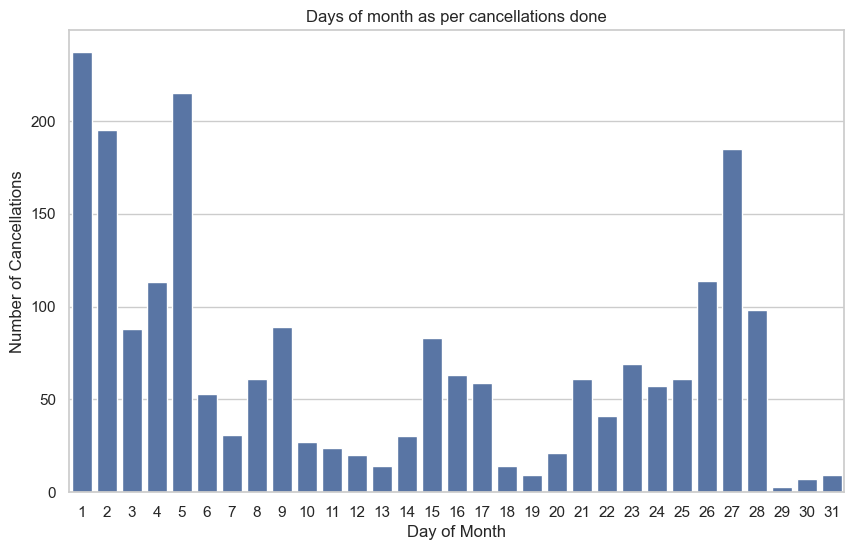

In [45]:
cancellation_count_days = list(collection.aggregate([
    {
        '$group': {
            '_id': '$DAY',
            'cancellation_count': {'$sum': '$CANCELLED'} }
        }
    ,
    {
        '$project': {
            '_id': 0,
            'DAY': '$_id',
            'cancellation_count': 1
        }
    },
    {'$sort': {'cancellation_count':-1}}
]))

for i in cancellation_count_days:
    print(i)

df = pd.DataFrame(cancellation_count_days)

# Plotting
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(y='cancellation_count', x='DAY', data=df)
plt.ylabel('Number of Cancellations')
plt.xlabel('Day of Month')
plt.title('Days of month as per cancellations done')
plt.show()

#### l) Find the busiest airports with respect to day of week. Represent it by using suitable plot.

In [60]:
busiest_airport = list(collection.aggregate([
    { '$group': {'_id': {
                'day_of_week': '$DAY_OF_WEEK',
                'origin_airport': '$ORIGIN_AIRPORT'
            },
            'flight_count': {'$sum': 1}
                }
    },
    {
        '$project': {
            '_id' : 0, 
            'day_of_week' : '$_id.day_of_week',
            'origin_airport' : '$_id.origin_airport',
            'flight_count' : 1 
        } 
    },
    {
        '$sort': {'flight_count':-1,'day_of_week': 1}
    }
    ]))

for i in range(10):
    print(busiest_airport[i])




{'flight_count': 574, 'day_of_week': 5, 'origin_airport': 'ATL'}
{'flight_count': 556, 'day_of_week': 4, 'origin_airport': 'ATL'}
{'flight_count': 555, 'day_of_week': 1, 'origin_airport': 'ATL'}
{'flight_count': 505, 'day_of_week': 3, 'origin_airport': 'ATL'}
{'flight_count': 499, 'day_of_week': 7, 'origin_airport': 'ATL'}
{'flight_count': 483, 'day_of_week': 5, 'origin_airport': 'ORD'}
{'flight_count': 475, 'day_of_week': 2, 'origin_airport': 'ATL'}
{'flight_count': 441, 'day_of_week': 4, 'origin_airport': 'ORD'}
{'flight_count': 436, 'day_of_week': 1, 'origin_airport': 'ORD'}
{'flight_count': 434, 'day_of_week': 5, 'origin_airport': 'DFW'}


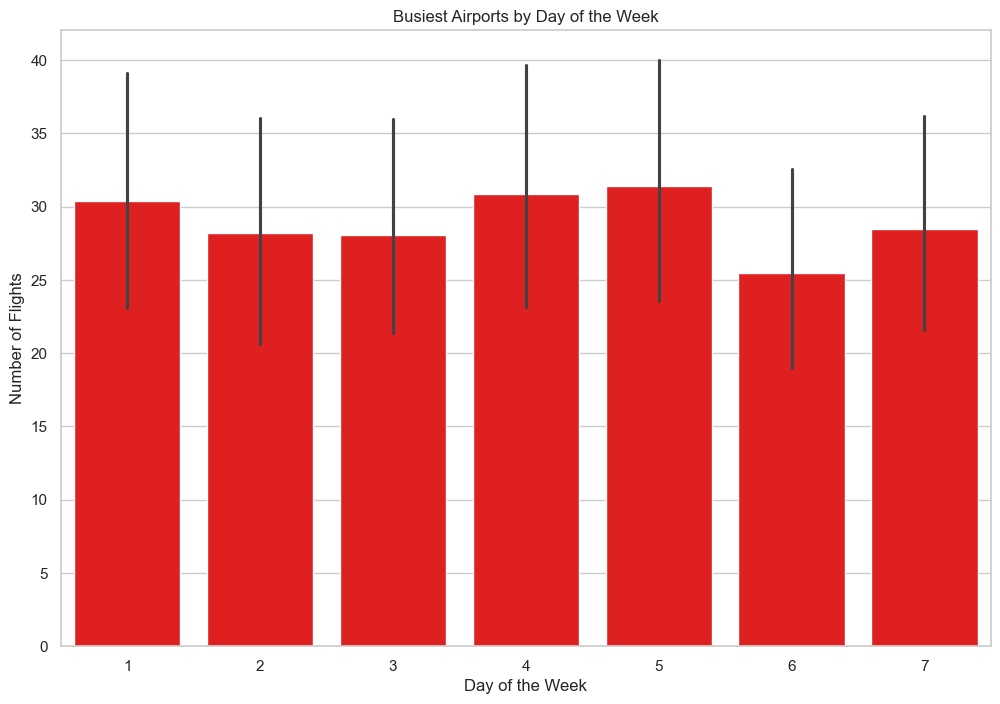

In [48]:
df = pd.DataFrame(busiest_airport)  

plt.figure(figsize=(12, 8))


sns.barplot(x='day_of_week', y='flight_count', data=df, color='red')

plt.title('Busiest Airports by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')

plt.show()

#### m) Find top 10 Airlines of US. Represent it by using suitable plot.

In [91]:
top_airlines = list(collection.aggregate([
    { '$group': {'_id':'$AIRLINE','airline_count':{'$sum': 1}}
    },
    {
        '$project': {'_id':0, 'AIRLINE':'$_id','airline_count': 1}
    },
    {
        '$sort': {'airline_count':-1}
    },
    {
        '$limit': 10
    }
]))

for i in top_airlines:
    print(i)

{'airline_count': 11738, 'AIRLINE': 'WN'}
{'airline_count': 7989, 'AIRLINE': 'DL'}
{'airline_count': 5916, 'AIRLINE': 'EV'}
{'airline_count': 5708, 'AIRLINE': 'OO'}
{'airline_count': 5250, 'AIRLINE': 'AA'}
{'airline_count': 4701, 'AIRLINE': 'UA'}
{'airline_count': 3925, 'AIRLINE': 'US'}
{'airline_count': 3502, 'AIRLINE': 'MQ'}
{'airline_count': 2548, 'AIRLINE': 'B6'}
{'airline_count': 1586, 'AIRLINE': 'AS'}


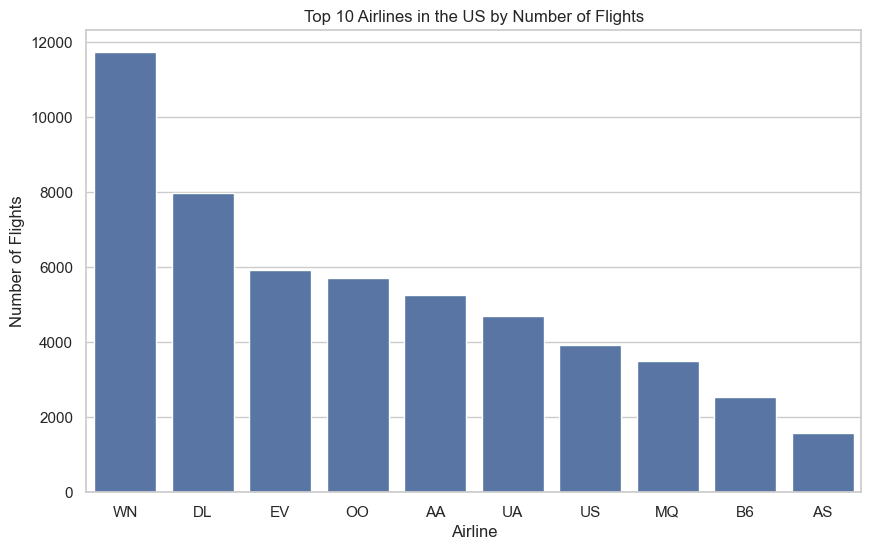

In [93]:


df = pd.DataFrame(top_airlines)



# Plotting using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y='airline_count', x='AIRLINE', data=df)
plt.ylabel('Number of Flights')
plt.xlabel('Airline')
plt.title('Top 10 Airlines in the US by Number of Flights')
plt.show()

n) Finding airlines that make the maximum, minimum number of cancellations.

In [8]:


minmax_cancel = collection.aggregate([
    { '$match': { 'CANCELLED': 1 } },
    { '$group': {
        '_id': "$AIRLINE",
        'cancellations': { '$sum': 1 }
    }},
    { '$facet': { 'max_cancel': [
            {'$sort': {'cancellations': -1}},
            {'$limit': 1},
            { '$project': {
                '_id': 0,
                'AIRLINE': "$_id",
                'cancellations': 1
            }}],
        'min_cancel': [
            {'$sort': {'cancellations': 1}},
            {'$limit': 1},
            { '$project': {
                '_id': 0,
                'AIRLINE': "$_id",
                'cancellations': 1}}]
                }
    }
])

for i in minmax_cancel: 
    print(i)

{'max_cancel': [{'cancellations': 414, 'AIRLINE': 'MQ'}], 'min_cancel': [{'cancellations': 3, 'AIRLINE': 'HA'}]}


#### o) Find and show airlines names in descending that make the most number of diversions made. [Create a suitable plot using matplotlib/seaborn]

In [49]:
most_diversions = list(collection.aggregate([
                                        {
                                            '$match': {'DIVERTED': 1}  
                                        },
                                
                                        {
                                        '$group': {'_id': '$AIRLINE','diversion_count': {'$sum':1}}
                                        },
                                        {
                                        '$project': {'_id':0, 'AIRLINE':'$_id','diversion_count': 1}
                                        },
                                        {
                                            '$sort': {'diversion_count':-1}
                                        }
                                         ]))

for i in most_diversions:
    print(i)

{'diversion_count': 35, 'AIRLINE': 'WN'}
{'diversion_count': 25, 'AIRLINE': 'OO'}
{'diversion_count': 22, 'AIRLINE': 'EV'}
{'diversion_count': 18, 'AIRLINE': 'DL'}
{'diversion_count': 16, 'AIRLINE': 'B6'}
{'diversion_count': 12, 'AIRLINE': 'AA'}
{'diversion_count': 9, 'AIRLINE': 'US'}
{'diversion_count': 8, 'AIRLINE': 'UA'}
{'diversion_count': 5, 'AIRLINE': 'MQ'}
{'diversion_count': 1, 'AIRLINE': 'HA'}


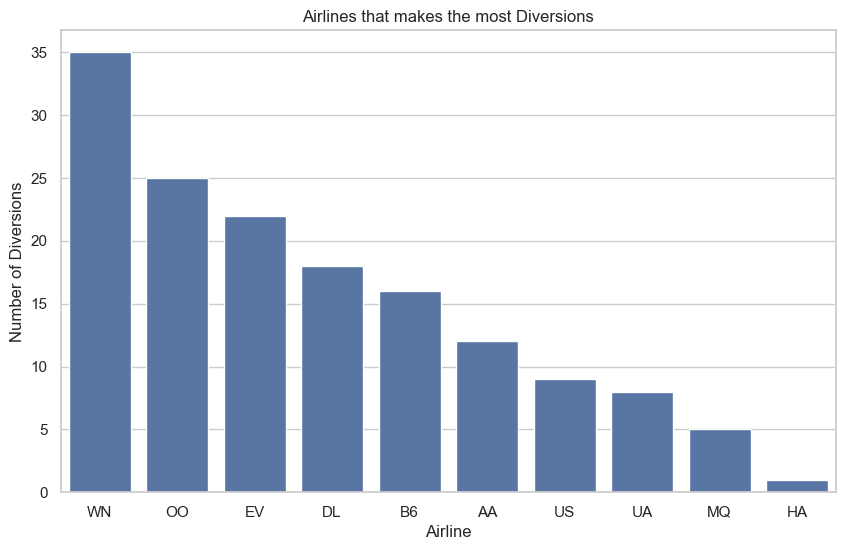

In [50]:


df = pd.DataFrame(most_diversions)



# Plotting using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y='diversion_count', x='AIRLINE', data=df)
plt.ylabel('Number of Diversions')
plt.xlabel('Airline')
plt.title('Airlines that makes the most Diversions')
plt.show()

#### p) Finding days of month that see the most number of diversion and delays.

In [100]:
most_diversion = collection.aggregate([
    {
        '$match': {
            '$or': [  
                {'DIVERTED': 1},
                {'DEPARTURE_DELAY': {'$gt': 0}},  
                {'ARRIVAL_DELAY': {'$gt': 0}}  
            ]
        }
    },
    {
        '$group': {
            '_id': '$DAY',  
            'diversion_count': {'$sum': {'$cond': [{'$eq': ['$DIVERTED', 1]}, 1, 0]}},  
            'delay_count': {'$sum': {'$cond': [{'$or': [{'$gt': ['$DEPARTURE_DELAY', 0]}, {'$gt': ['$ARRIVAL_DELAY', 0]}]}, 1, 0]}}  
        }
    },
    {
        '$project': {
            '_id': 0,
            'day_of_month': '$_id',
            'total_disruptions': {'$add': ['$diversion_count', '$delay_count']} 
        }
    },
    {
        '$sort': {'total_disruptions': -1} 
    }
])


for i in most_diversion:
    print(i)

{'day_of_month': 2, 'total_disruptions': 1787}
{'day_of_month': 5, 'total_disruptions': 1730}
{'day_of_month': 4, 'total_disruptions': 1713}
{'day_of_month': 3, 'total_disruptions': 1603}
{'day_of_month': 6, 'total_disruptions': 1482}
{'day_of_month': 1, 'total_disruptions': 1453}
{'day_of_month': 9, 'total_disruptions': 1333}
{'day_of_month': 8, 'total_disruptions': 1188}
{'day_of_month': 7, 'total_disruptions': 1097}
{'day_of_month': 26, 'total_disruptions': 1034}
{'day_of_month': 16, 'total_disruptions': 1016}
{'day_of_month': 12, 'total_disruptions': 990}
{'day_of_month': 23, 'total_disruptions': 922}
{'day_of_month': 22, 'total_disruptions': 904}
{'day_of_month': 13, 'total_disruptions': 893}
{'day_of_month': 27, 'total_disruptions': 878}
{'day_of_month': 15, 'total_disruptions': 851}
{'day_of_month': 20, 'total_disruptions': 842}
{'day_of_month': 18, 'total_disruptions': 837}
{'day_of_month': 17, 'total_disruptions': 824}
{'day_of_month': 19, 'total_disruptions': 811}
{'day_of_mo

#### q) Write a MongoDB query to find the flights with the shortest and longest AIR_TIME. Return the flightNumber, airline, and AIR_TIME.

In [107]:
collection.update_many(
    {'AIR_TIME': {'$in': [None, float('nan')]}},
    {'$set': {'AIR_TIME': 0}}  
)

UpdateResult({'n': 2302, 'nModified': 2302, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [111]:

shortest_air_time_flight = list(collection.aggregate([
    {
        '$match':{'AIR_TIME': {'$ne': 0}}
    },
    {
        '$sort': {'AIR_TIME': 1}  
    },
    {
        '$limit': 1  
    },
    {
        '$project': {  
            '_id': 0,
            'flightNumber': '$FLIGHT_NUMBER',
            'airline': '$AIRLINE',
            'air_time': '$AIR_TIME'
        }
    }
]))

longest_air_time_flight = list(collection.aggregate([
    {
        '$match':{'AIR_TIME': {'$ne': 0}}
    },
    {
        '$sort': {'AIR_TIME': -1}  
    },
    {
        '$limit': 1  
    },
    {
        '$project': {  
            '_id': 0,
            'flightNumber': '$FLIGHT_NUMBER',
            'airline': '$AIRLINE',
            'air_time': '$AIR_TIME'
        }
    }
]))


print("Shortest AIR_TIME Flight:", shortest_air_time_flight)
print("Longest AIR_TIME Flight:", longest_air_time_flight)



Shortest AIR_TIME Flight: [{'flightNumber': 65, 'airline': 'AS', 'air_time': 9.0}]
Longest AIR_TIME Flight: [{'flightNumber': 15, 'airline': 'UA', 'air_time': 654.0}]


#### r) Finding all diverted Route from a source to destination Airport & which route is the most diverted route.

In [61]:
diverted_route = list(collection.aggregate([


    {
        '$match': {'DIVERTED': 1}  
    },
    { '$group': {'_id': {
                
                'origin_airport': '$ORIGIN_AIRPORT',
                'destination_airport': '$DESTINATION_AIRPORT',
        
        
            },
            'diversion_count': {'$sum': 1 }
                }
    },
    {
        '$project': {
            '_id' : 0, 
            'origin_airport' : '$_id.origin_airport',
            'destination_airport' : '$_id.destination_airport',
            'diversion_count' : 1 
        } 
    },
    {
        '$sort': {'diversion_count': -1}
    }
    ]))

for i in range(10):
    print(diverted_route[i])

print("Most diverted Route: ", diverted_route[0])

{'diversion_count': 2, 'origin_airport': 'IAH', 'destination_airport': 'ASE'}
{'diversion_count': 2, 'origin_airport': 'HOU', 'destination_airport': 'DAL'}
{'diversion_count': 2, 'origin_airport': 'JFK', 'destination_airport': 'EGE'}
{'diversion_count': 2, 'origin_airport': 'TPA', 'destination_airport': 'LGA'}
{'diversion_count': 2, 'origin_airport': 'JFK', 'destination_airport': 'SEA'}
{'diversion_count': 2, 'origin_airport': 'PHL', 'destination_airport': 'SAN'}
{'diversion_count': 2, 'origin_airport': 'CLT', 'destination_airport': 'IAH'}
{'diversion_count': 2, 'origin_airport': 'ORD', 'destination_airport': 'ASE'}
{'diversion_count': 2, 'origin_airport': 'STT', 'destination_airport': 'PHL'}
{'diversion_count': 1, 'origin_airport': 'DFW', 'destination_airport': 'COS'}
Most diverted Route:  {'diversion_count': 2, 'origin_airport': 'IAH', 'destination_airport': 'ASE'}


#### s) Write a MongoDB aggregation pipeline to calculate the all aggregated values for departure delay (DEPARTURE_DELAY) and arrival delay (ARRIVAL_DELAY) for each airline, excluding flights that were either cancelled or diverted.

In [51]:


delay = collection.aggregate([{
        '$match': {'$or': [
                {'DIVERTED': 1},
                {'CANCELLED': 1}
            ]}  
    },
    {
        '$group': {
            '_id': '$ORIGIN_AIRPORT',
            'total_delay': {
                '$sum': {
                    '$add': ['$DEPARTURE_DELAY', '$ARRIVAL_DELAY']
                }
            }
        }
    },
    {
        '$project': {
            '_id': 0,
            'AIRLINE': '$_id',
            'total_delay': 1
        }
    },
    {
        '$sort': {
            'total_delay': -1
        }
    }, {'$limit': 5}
])

for i in delay:
    print(i)

{'total_delay': 224.54545793139408, 'AIRLINE': 'KOA'}
{'total_delay': 85.5454579313941, 'AIRLINE': 'STX'}
{'total_delay': 39.5454579313941, 'AIRLINE': 'CHA'}
{'total_delay': 3.5454579313940933, 'AIRLINE': 'TUS'}
{'total_delay': -0.9090841372118135, 'AIRLINE': 'STT'}


#### t) Write a MongoDB query to find all flights that were delayed due to WEATHER_DELAY but were not cancelled or diverted. Include the flightNumber, airline, originAirport, and destinationAirport in the results.

In [62]:

query = collection.find(
    {  
        'WEATHER_DELAY': {'$gt': 0},  
        'CANCELLED': 0,               
        'DIVERTED': 0                 
    },
    {  
        '_id': 0,  
        'FLIGHT_NUMBER': 1,           
        'AIRLINE': 1,                 
        'ORIGIN_AIRPORT': 1,         
        'DESTINATION_AIRPORT': 1 ,
        'WEATHER_DELAY': 1
    }
)


for flight in range(10):
    print(query[flight])


{'AIRLINE': 'UA', 'FLIGHT_NUMBER': 532, 'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT': 'DCA', 'WEATHER_DELAY': 10.0}
{'AIRLINE': 'US', 'FLIGHT_NUMBER': 1784, 'ORIGIN_AIRPORT': 'BWI', 'DESTINATION_AIRPORT': 'PHX', 'WEATHER_DELAY': 56.0}
{'AIRLINE': 'MQ', 'FLIGHT_NUMBER': 3019, 'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT': 'OKC', 'WEATHER_DELAY': 15.0}
{'AIRLINE': 'MQ', 'FLIGHT_NUMBER': 3564, 'ORIGIN_AIRPORT': 'GSO', 'DESTINATION_AIRPORT': 'LGA', 'WEATHER_DELAY': 104.0}
{'AIRLINE': 'UA', 'FLIGHT_NUMBER': 1667, 'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT': 'PDX', 'WEATHER_DELAY': 99.0}
{'AIRLINE': 'DL', 'FLIGHT_NUMBER': 1788, 'ORIGIN_AIRPORT': 'ATL', 'DESTINATION_AIRPORT': 'MEM', 'WEATHER_DELAY': 163.0}
{'AIRLINE': 'DL', 'FLIGHT_NUMBER': 424, 'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT': 'LAX', 'WEATHER_DELAY': 39.0}
{'AIRLINE': 'MQ', 'FLIGHT_NUMBER': 3201, 'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT': 'BNA', 'WEATHER_DELAY': 14.0}
{'AIRLINE': 'UA', 'FLIGHT_NUMBER': 1718, 'ORIGIN

#### u) Write a MongoDB query to find all flights that were delayed both at departure (DEPARTURE_DELAY) and arrival (ARRIVAL_DELAY). Return the count of such Flights which are delayed.

In [53]:

query1 = collection.count_documents(
    {  
        'DEPARTURE_DELAY': {'$gt': 0},  
        'ARRIVAL_DELAY': {'$gt': 0},
                        
    }
)

print(query1)

16601


#### v) Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined time intervals (e.g., every hour) throughout the day. Generate a Suitable Plot.

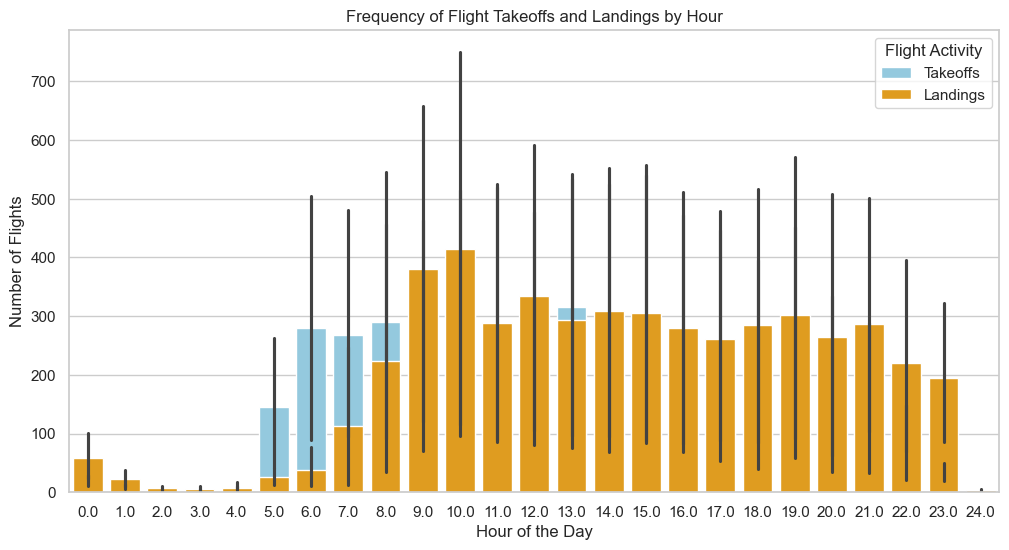

In [54]:
pipeline = [
    {
        '$match': {  
            'DEPARTURE_TIME': {'$gte': 0},
            'ARRIVAL_TIME': {'$gte': 0}
        }
    },
    {
        '$project': {  
            'departure_hour': {'$floor': {'$divide': ['$DEPARTURE_TIME', 100]}},  
            'arrival_hour': {'$floor': {'$divide': ['$ARRIVAL_TIME', 100]}}  
        }
    },
    {
        '$group': {  
            '_id': {
                'departure_hour': '$departure_hour',
                'arrival_hour': '$arrival_hour'
            },
            'count': {'$sum': 1}  
        }
    },
    {
        '$project': {  
            '_id': 0,
            'departure_hour': '$_id.departure_hour',
            'arrival_hour': '$_id.arrival_hour',
            'count': 1
        }
    },
    {
        '$sort': {'departure_hour': 1, 'arrival_hour': 1}  
    }
]


flight_freq = list(collection.aggregate(pipeline))


flight_freq_df = pd.DataFrame(flight_freq)


plt.figure(figsize=(12, 6))


sns.barplot(x='departure_hour', y='count', data=flight_freq_df, color='skyblue', label='Takeoffs')


sns.barplot(x='arrival_hour', y='count', data=flight_freq_df, color='orange', label='Landings')

plt.title('Frequency of Flight Takeoffs and Landings by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Flights')
plt.legend(title='Flight Activity')
plt.show()

#### w) Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined week of day. Generate a Suitable Plot.

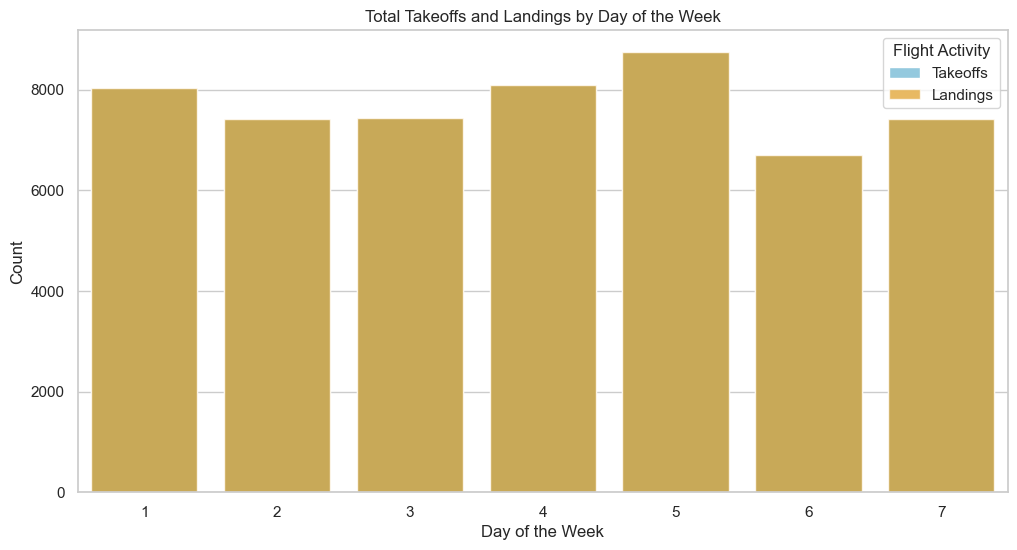

In [39]:
pipeline = [
    {
        '$match': { 
            'DEPARTURE_TIME': {'$gt': 0},
            'ARRIVAL_TIME': {'$gt': 0}
        }
    },
    {
        '$group': { 
            '_id': '$DAY_OF_WEEK',
            'flight_takeoffs': {'$sum': 1},  
            'flight_landings': {'$sum': 1}    
        }
    },
    {
        '$project': {  
            '_id': 0,
            'DAY_OF_WEEK': '$_id',
            'flight_takeoffs': 1,
            'flight_landings': 1
        }
    },
    {
        '$sort': {'DAY_OF_WEEK': 1}  
    }
]


freq = list(collection.aggregate(pipeline))


df = pd.DataFrame(freq)


plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='DAY_OF_WEEK', y='flight_takeoffs', color='skyblue', label='Takeoffs')
sns.barplot(data=df, x='DAY_OF_WEEK', y='flight_landings', color='orange', label='Landings', alpha=0.7)

plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Total Takeoffs and Landings by Day of the Week')
plt.legend(title='Flight Activity')
plt.show()

#### .
x) Write a MongoDB query to find all flights that departed between 6 AM and 12 PM (noon) local ti e,
regardless of the date. Return the flightNumber, airline, and departureTime. Generate a Bar Plot g desusintination airport pairs with the longest delays.

DEPARTURE_TIME
6.0     3
7.0     1
8.0     6
9.0     2
10.0    2
11.0    1
12.0    5
Name: count, dtype: int64


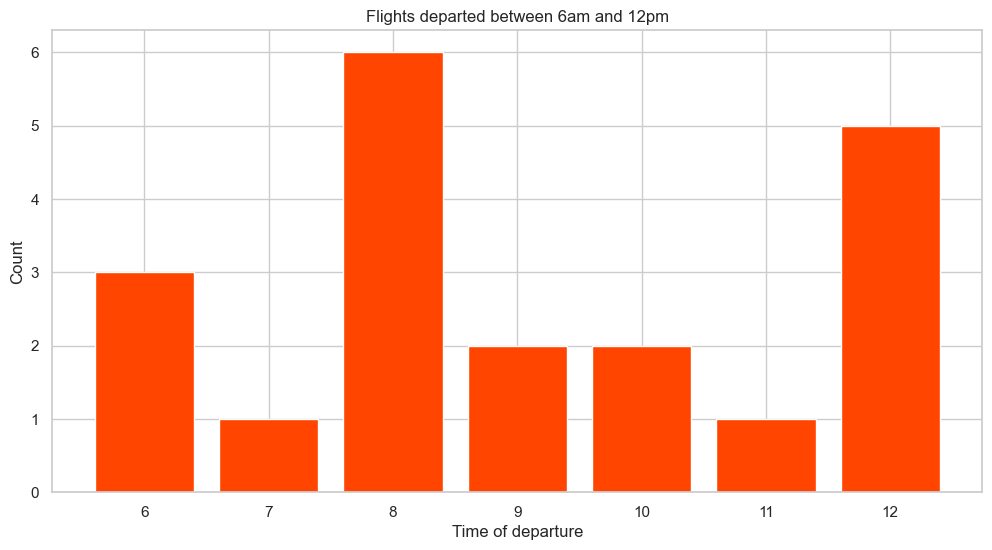

In [11]:
time = collection.aggregate([
    {'$match': {'DEPARTURE_TIME': {'$gte': 6.0, '$lte': 12.0}}},
    {'$project' : {'_id':0,'FLIGHT_NUMBER':1,'AIRLINE':1,'DEPARTURE_TIME':{'$floor' : '$DEPARTURE_TIME'}}}
])
flight_time_df = pd.DataFrame(time)
freq = flight_time_df.groupby('DEPARTURE_TIME')['DEPARTURE_TIME'].value_counts()
print(freq)

plt.figure(figsize=(12, 6))
plt.bar(height=freq.values, x=freq.index, color='orangered')
plt.xlabel('Time of departure')
plt.ylabel('Count')
plt.title('Flights departed between 6am and 12pm')


plt.show()

y) When is the best time of day/day of week/time of a year to fly with minimum delays?

In [23]:
best = collection.aggregate([
    {
        '$group': {
            '_id': '$DAY',  
            'delay': {'$avg': {'$cond': [{'$or': [{'$gt': ['$DEPARTURE_DELAY', 0]}, {'$gt': ['$ARRIVAL_DELAY', 0]}]}, 1, 0]}}  
        }
    },
    {
        '$project': {
            '_id': 0,
            'day_of_month': '$_id',
            'delay':1
             
        }
    },
    {
        '$sort': {'delay': 1} 
    },{'$limit': 1}
])


for i in best:
    print(i)

{'delay': 0.3860182370820669, 'day_of_month': 31}


In [21]:
best = collection.aggregate([
    {
        '$group': {
            '_id': '$DAY_OF_WEEK',  
            'delay': {'$avg': {'$cond': [{'$or': [{'$gt': ['$DEPARTURE_DELAY', 0]}, {'$gt': ['$ARRIVAL_DELAY', 0]}]}, 1, 0]}}  
        }
    },
    {
        '$project': {
            '_id': 0,
            'day_of_week': '$_id',
            'delay':1
             
        }
    },
    {
        '$sort': {'delay': 1} 
    },{'$limit': 1}
])


for i in best:
    print(i)

{'delay_count': 0.49985473561882626, 'day_of_week': 6}


In [22]:
best = collection.aggregate([
    {
        '$group': {
            '_id': '$MONTH',  
            'delay': {'$avg': {'$cond': [{'$or': [{'$gt': ['$DEPARTURE_DELAY', 0]}, {'$gt': ['$ARRIVAL_DELAY', 0]}]}, 1, 0]}}  
        }
    },
    {
        '$project': {
            '_id': 0,
            'MONTH': '$_id',
            'delay':1
             
        }
    },
    {
        '$sort': {'delay': 1} 
    },{'$limit': 1}
])


for i in best:
    print(i)

{'delay': 0.5123284391956591, 'MONTH': 1}


In [15]:
flights_df

,ID,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,0,2015,3,4,3,EV,5170,N842AS,CVG,XNA,...,1103.0,33.000000,0,0,NaN,14.0,0.0,19.0,0.0,0.0
1,1,2015,2,2,1,MQ,3584,N646MQ,DFW,SPS,...,1402.0,32.000000,0,0,NaN,0.0,0.0,32.0,0.0,0.0
2,2,2015,1,27,2,B6,716,N309JB,JAX,DCA,...,1655.0,96.000000,0,0,NaN,6.0,0.0,90.0,0.0,0.0
3,3,2015,1,28,3,EV,4289,N14162,COS,IAH,...,1742.0,-19.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2015,2,5,4,EV,5584,N851AS,ATL,AVL,...,1352.0,9.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,55995,2015,2,4,3,B6,1567,N508JB,HPN,PBI,...,1338.0,174.000000,0,0,NaN,10.0,0.0,164.0,0.0,0.0
55996,55996,2015,1,17,6,AA,1113,N4YBAA,PIT,DFW,...,1055.0,-30.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
55997,55997,2015,1,17,6,US,661,N534UW,LAX,PHL,...,1424.0,-3.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
55998,55998,2015,1,13,2,DL,1318,N348NB,ATL,CLT,...,1116.0,-3.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
